# 기본 설정

## 필요 모듈 import. 차트의 한글 설정 등

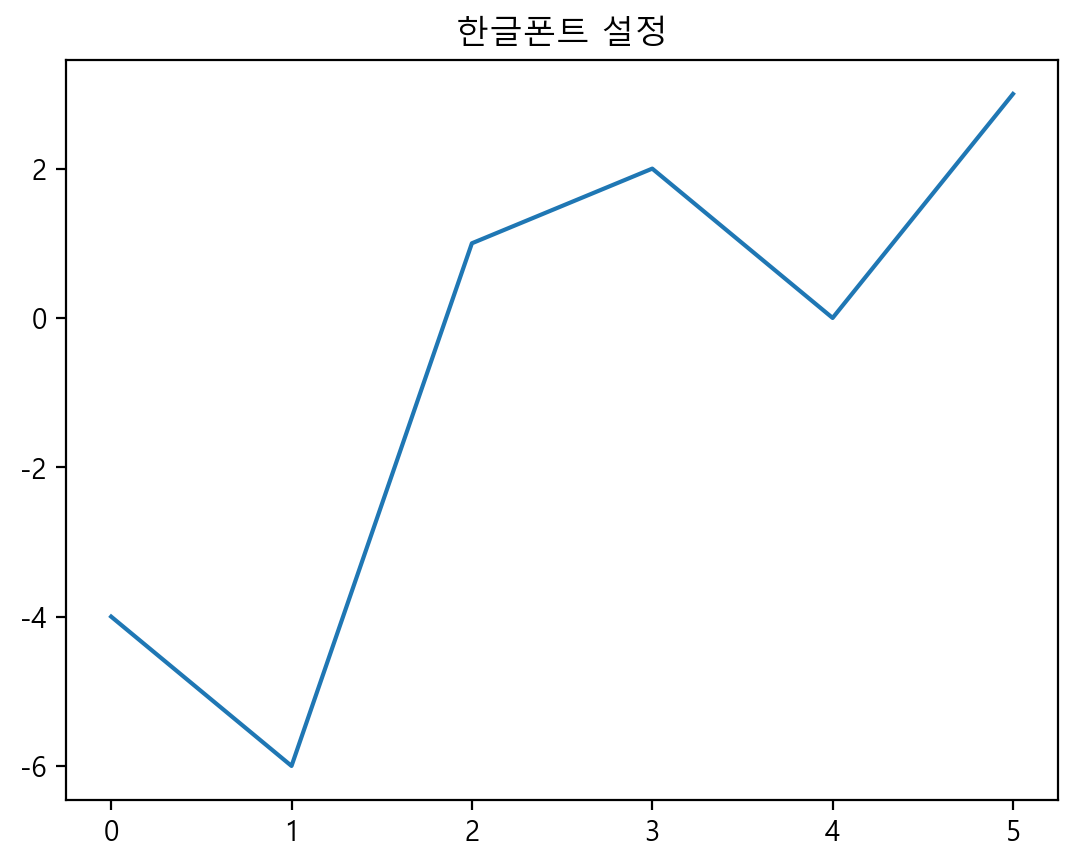

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 40
plt.rcParams['figure.figsize'] = [40, 20] # 전역으로 차트의 크기 설정
def setTick():
    plt.tick_params(colors='white', which='both', labelsize=20)

plt.style.use('default')
    
fontdictHead={'fontsize': 50, 'color': 'yellow'}
fontdictBody={'fontsize': 30, 'color': 'white'}

# if mac
def ifMac() :
    plt.rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False    

# ifMac()

plt.rc("font", family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.title('한글폰트 설정')
plt.plot([-4, -6, 1, 2, 0, 3])


## 상가업소정보_201912_01.csv 파일을 불러와서 df에 저장

In [265]:
df = pd.read_csv('./Merchant/상가업소정보_201912_01.csv', sep='|')
pd.options.display.max_columns = 39

## n변수에 각 컬럼의 결측치 갯수를 모두 합한 결과를 담습니다

In [266]:
n = df.isna().sum()

## n 변수에 담긴 값을 정렬해서 상위 9개만 not_use변수에 담습니다.

In [267]:
not_use = n.sort_values(ascending=False).head(9)

## 저장된 결측치 데이터에서 결측치 합계를 제외하고 행제목(인덱스)들만 따로 not_use_col 변수에 저장

In [268]:
not_use_col = not_use.index

## 변수의값들을 갖고 df에서 컬럼들을 제거

In [269]:
print(df.shape)
df = df.drop(not_use_col, axis=1)
print(df.shape)

(573680, 39)
(573680, 30)


## 코드|번호가 포함된 컬럼명을 처리하기 위해 cols라는 변수에컬럼이름들을 담습니다.

In [270]:
cols = df.columns

## "코드", "번호"가 들어가는 컬럼명만 drop으로 데이터프레임에서 제거

In [271]:
del_cols = cols[cols.str.contains('코드|번호')]

print(df.shape)
df = df.drop(del_cols, axis=1)
print(df.shape)

df.head()

(573680, 30)
(573680, 16)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,대지,578,부산광역시 사상구 괘법동 578,부산광역시 사상구 괘감로,37,부산광역시 사상구 괘감로 37,128.980455,35.159774
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,대지,256,서울특별시 송파구 석촌동 256,서울특별시 송파구 가락로,71,서울특별시 송파구 가락로 71,127.104071,37.500249


## 추가로 "대지구분명", "지번본번지", "지번주소", "도로명", "건물본번지"도 삭제합니다

In [272]:
print(df.shape)
df = df.drop(['대지구분명', '지번본번지', '지번주소', '도로명', '건물본번지'], axis=1)
print(df.shape)

(573680, 16)
(573680, 11)


## 서울데이터만 필터링합니다.

In [273]:
df_seoul = df[df['시도명'] == '서울특별시']

## "seoul_open_store.csv" 라는 이름으로 저장합니다.

In [274]:
df_seoul.to_csv('seoul_open_store.csv', index=False)

#  베스킨라빈스, 던킨도너츠 위치 분석
## 데이터 정제
- 여기에서는 베스킨라빈스와 던킨도너츠 상호를 가져와서 실습합니다.
- 위에서 pandas의 str.contains를 활용해봅니다.
- 상호명에서 브랜드명을 추출합니다.
- 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
- 오타를 방지하기 위해 베스킨라빈스의 영문명은 baskinrobbins, 던킨도너츠는 dunkindonuts입니다.

In [275]:
df_seoul.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


### 영문 소문자로 변경 후 저장

In [276]:
df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower()

<ipython-input-276-1b33970b914b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower()


In [277]:
df_seoul.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922,와라와라호프
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675,커피빈코리아선릉로93길점
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711,프로포즈
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249,가락사우나내스낵
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149,초밥왕


### 베스킨라빈스 조회

In [278]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins'), '상호명_소문자'].shape

(466,)

### 던킨도너츠 조회

In [279]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('던킨|dunkin'), '상호명_소문자'].shape

(191,)

### 베스킨라빈스 + 던킨도너츠로 필터링하고, df_31에 저장합니다.

In [280]:
df_31 = df_seoul[df_seoul['상호명_소문자'].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin')]
df_31.shape

(657, 12)

In [281]:
df_31.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠테크노마트점
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,베스킨라빈스
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,던킨도너츠창동하나로


### '브랜드명'이라는 새로운 컬럼 추가

In [282]:
# 상호명_소문자를 통해 새로운 컬럼 '브랜드명'컬럼에 '배스킨라빈스'값 추가
df_31.loc[df_31['상호명_소문자'].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins'), '브랜드명'] = '배스킨라빈스'

c:\users\java01\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\java01\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [283]:
# 브랜드명의 결측치(빈칸)에 던킨도너츠를 채웁니다.
df_31['브랜드명'] = df_31['브랜드명'].fillna('던킨도너츠')

<ipython-input-283-4a265a9b2c9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_31['브랜드명'] = df_31['브랜드명'].fillna('던킨도너츠')


In [284]:
df_31[['상호명', '브랜드명']].head()

,상호명,브랜드명
76,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,던킨도너츠
1819,던킨도너츠테크노마트점,던킨도너츠
2164,베스킨라빈스,배스킨라빈스
2305,던킨도너츠창동하나로,던킨도너츠


In [285]:
# 데이터가 제대로 모아졌는지 확인합니다.
# "상권업종대분류명"을 value_counts로 빈도수를 체크합니다.
df_31['상권업종대분류명'].value_counts()

음식       655
소매         1
생활서비스      1
Name: 상권업종대분류명, dtype: int64

In [286]:
# '상권업종대분류명'컬럼에서 isin 기능을 사용해서 '소매', '생활서비스'인 데이터만 검색해봅니다.
df_31[df_31['상권업종대분류명'].isin(['소매', '생활서비스'])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
358699,배스킨라빈스,소매,종합소매점,할인점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,배스킨라빈스
556592,baskinrobbins,생활서비스,광고/인쇄,인쇄종합,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,배스킨라빈스


### 소매, 생활서비스가 아닌것만 필터링

In [287]:
# & : and , | : or , ~ : not - not연산자를 통해 소매, 생활서비스가 아닌것만 필터링합니다.
df_31 = df_31[~df_31['상권업종대분류명'].isin(['소매', '생활서비스'])]

In [288]:
df_31.shape

(655, 13)

## 시각화

### plot.barh

<AxesSubplot:>

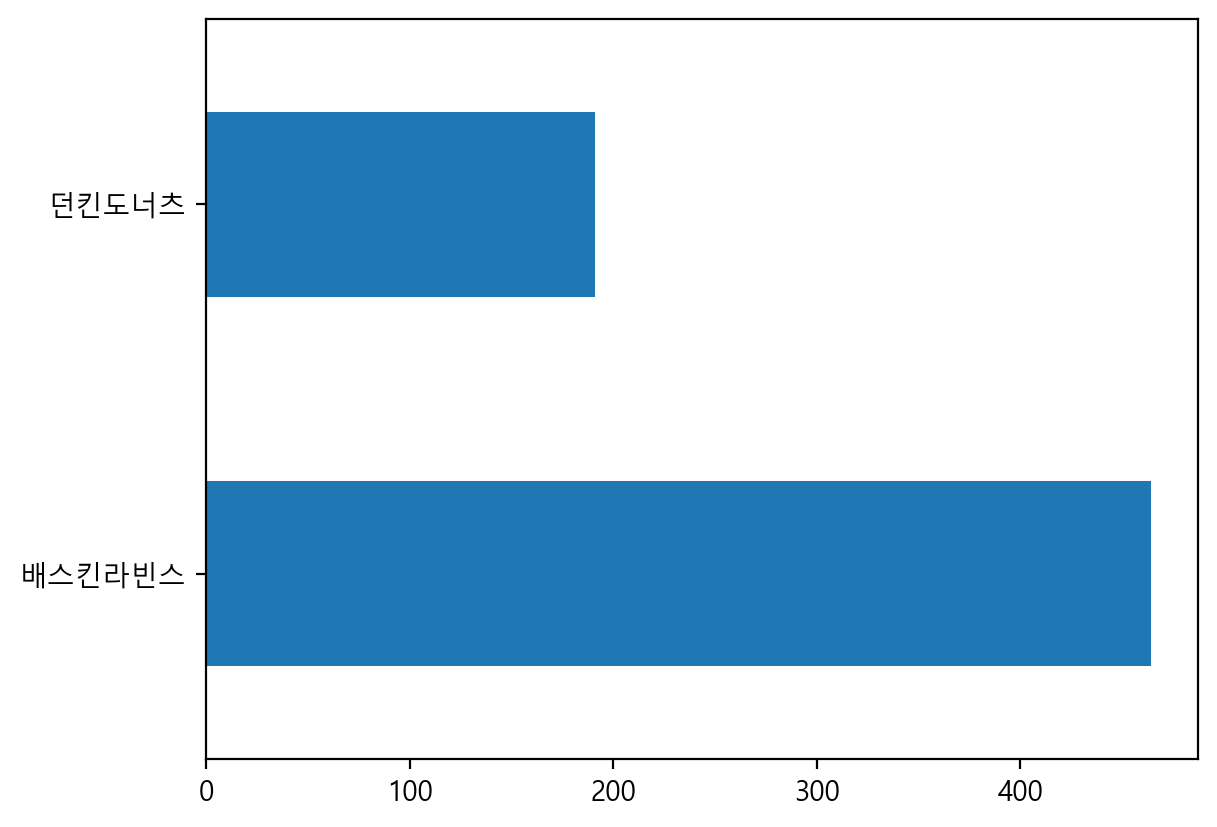

In [289]:
# 브랜드명으로 각 브랜드의 갯수를 표현
df_31['브랜드명'].value_counts().plot.barh()

### plot barh normalize

<AxesSubplot:>

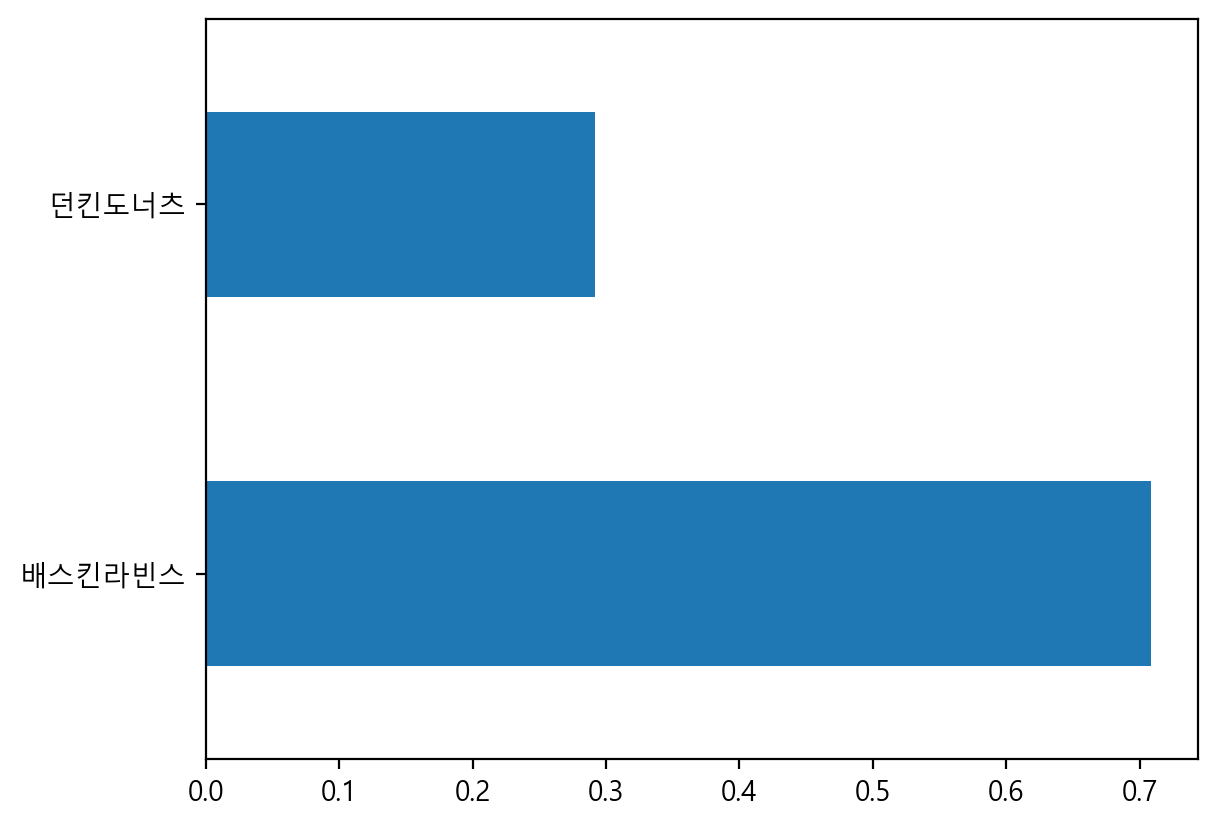

In [290]:
# 브랜드명의 value_counts값을 비율로 표시하고 이를 차트에 표현합니다.
df_31['브랜드명'].value_counts(normalize=True).plot.barh()

### countplot

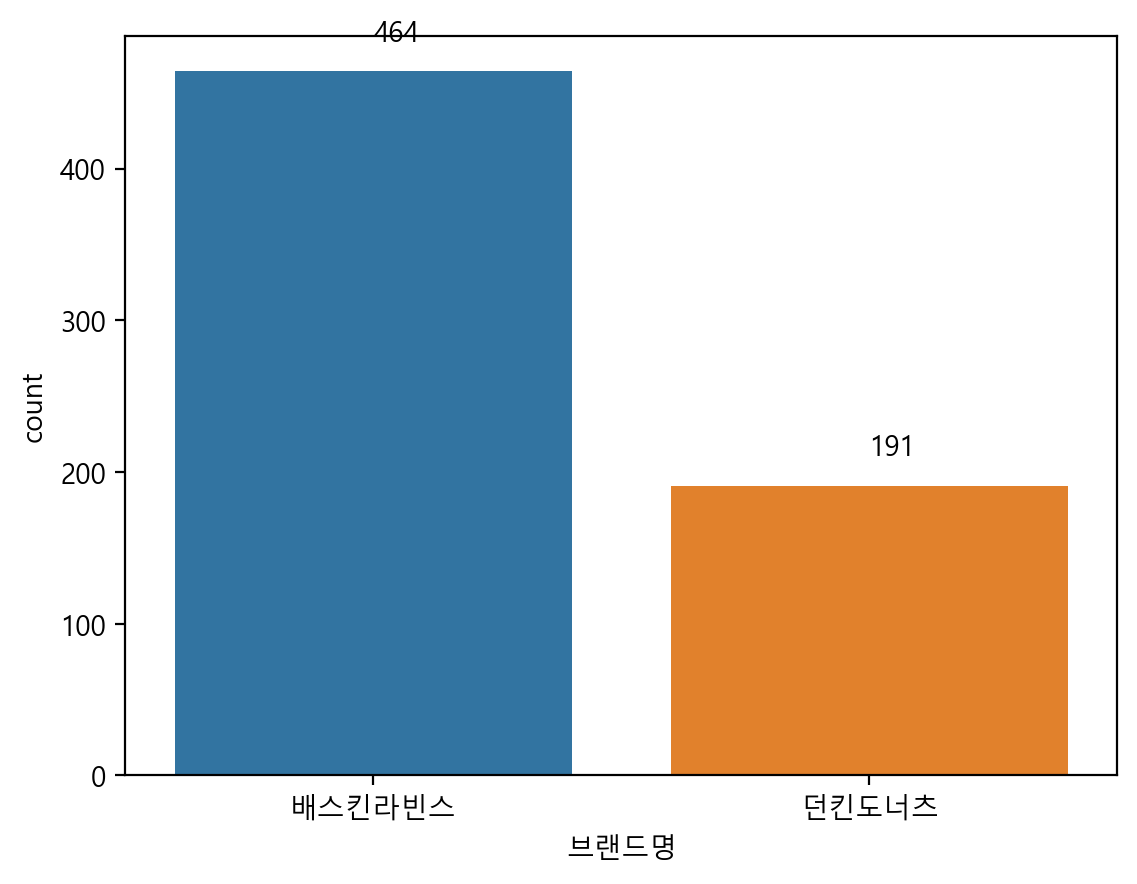

In [291]:
# seaborn과 countplot을 이용한 그래프
brand_count = df_31['브랜드명'].value_counts()
g = sns.countplot(data = df_31, x='브랜드명')

# x, y좌표에 brand_count 값을 표시합니다.
for i, val in enumerate(brand_count.index) :
    g.text(x=i, y=brand_count[i]+20, s=brand_count[i])

### countplot

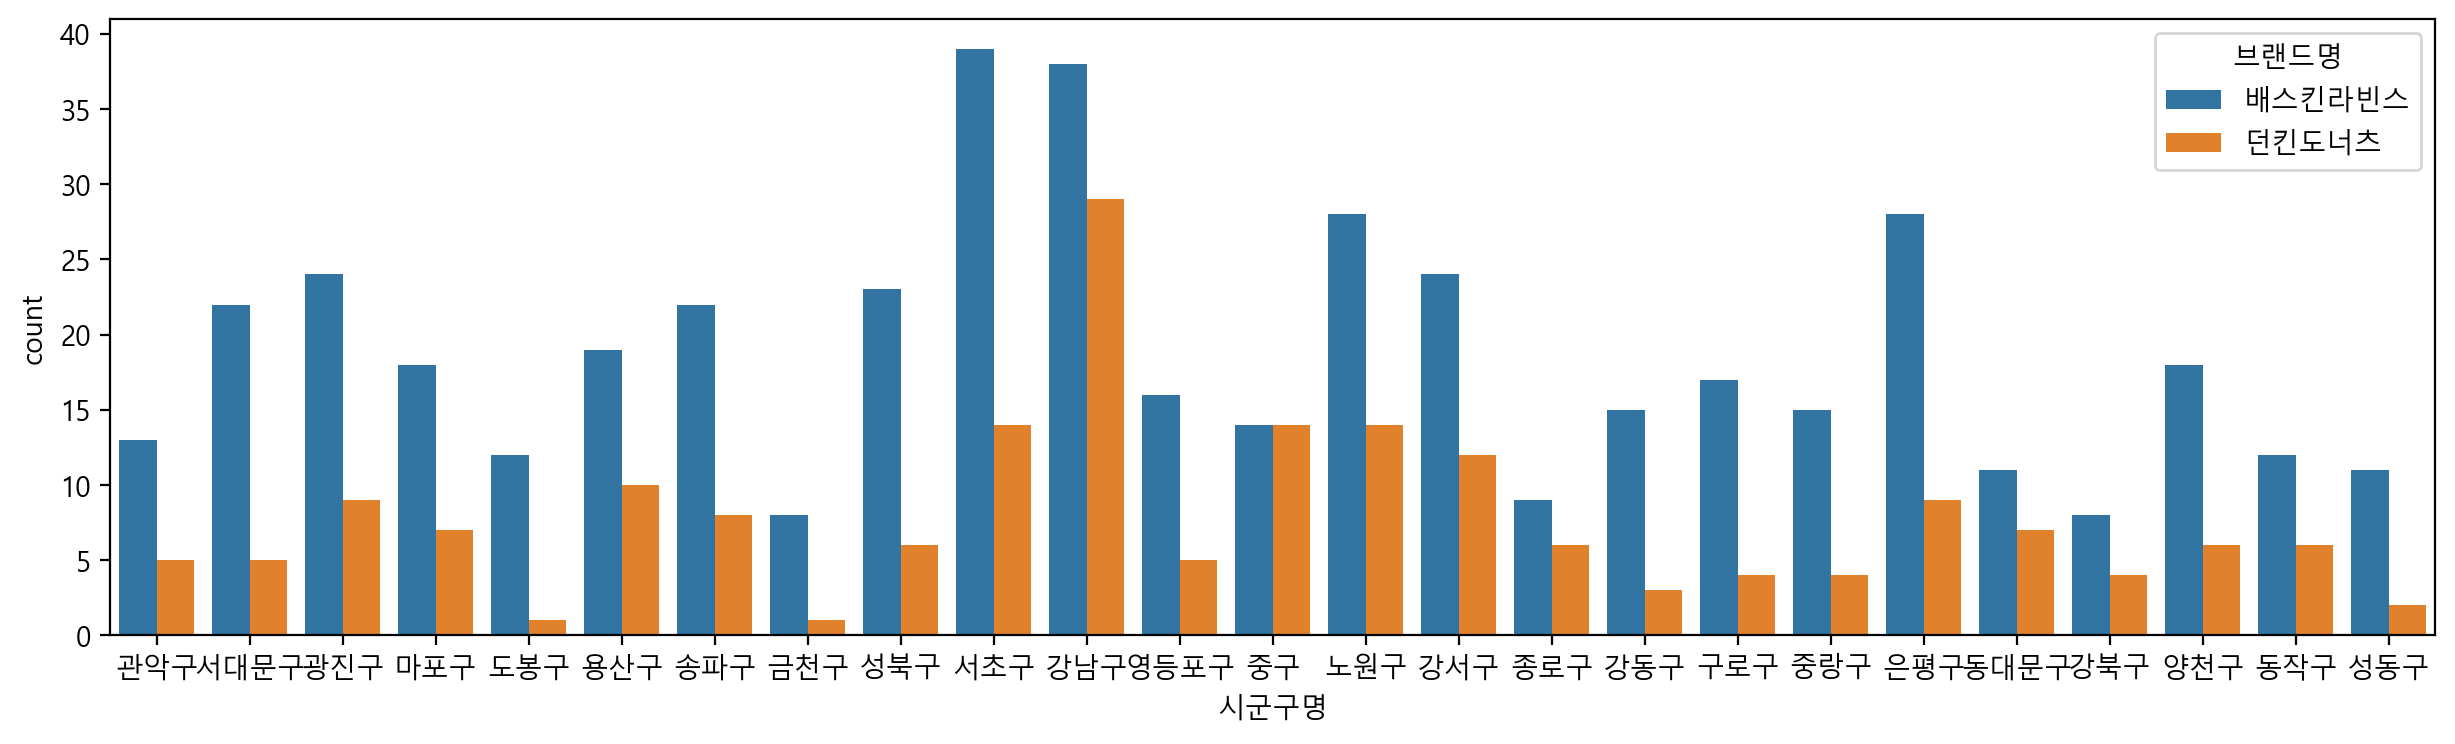

In [292]:
# 시군구명으로 빈도수를 세고, 브랜드명으로 다르게 표현하는 countplot을 그립니다.
plt.figure(figsize=(15, 4))
g = sns.countplot(data=df_31, x='시군구명', hue='브랜드명')

### scatterplot

<AxesSubplot:xlabel='경도', ylabel='위도'>

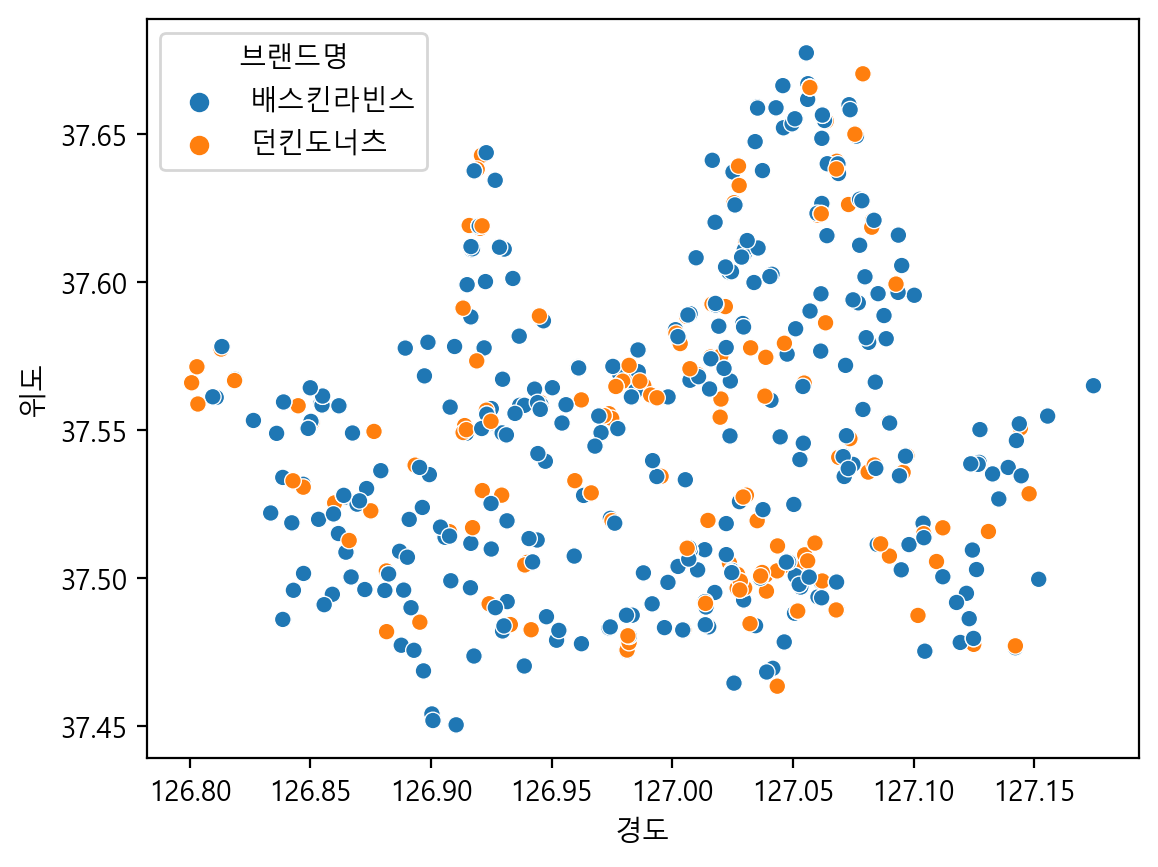

In [293]:
# seaborn의 scatterplot으로 hue에 브랜드명을 지정해서 시각화합니다.
sns.scatterplot(data=df_31, x='경도', y='위도', hue='브랜드명')

### folium

In [294]:
# Lat : 37.495593 Long : 127.039032 tooltip: '던킨도너츠'의 값으로
# folium 맵에 마킹하세요

##### import

In [295]:
import folium

### 중앙 기준으로 지도표출 1: tooltip하나 생성

In [296]:
# 중앙값 = 각각 쳥균값
centerLat, centerLong = df_31['위도'].mean(), df_31['경도'].mean()

# 임의의 위경도와 툴팁설정
lat, long, tooltip = 37.495593,127.039032, '던킨도너츠'

# 지도표출
m = folium.Map(location=[centerLat, centerLong], zoom_start=12)
folium.Marker([lat, long], tooltip=tooltip).add_to(m)
m

### 중앙 기준으로 지도표출 2: 모든 매장 출력
- df_31의 위도값들과 경도값들을 이용하여 모두마킹
- tooltip값은 브랜드명-도로명주소로 설정합니다.
- zoom_start는 12 또는 11 중 적절히 설정하세요
- 던킨도너츠는 빨간색, 베스킨라빈스는 파란색으로 마킹하세요.

In [297]:
# 중앙값 = 각각 쳥균값
centerLat, centerLong = df_31['위도'].mean(), df_31['경도'].mean()
m = folium.Map(location=[centerLat, centerLong], zoom_start=12)

# 모든 값 순회
for i in df_31.index[:] :
    tooltip = df_31.loc[i, '상호명'] + ' - (' + df_31.loc[i, '도로명주소'] + ')'
    lat = df_31.loc[i, '위도']
    long = df_31.loc[i, '경도']
        
    folium.Marker([lat, long], tooltip=tooltip, ).add_to(m)
m

### 중앙 기준으로 지도표출 3: 모든 매장 마커로 출력

In [298]:
# 중앙값 = 각각 쳥균값
centerLat, centerLong = df_31['위도'].mean(), df_31['경도'].mean()
m = folium.Map(location=[centerLat, centerLong], zoom_start=12)

# 모든 값 순회
for i in df_31.index[:] :
    title = df_31.loc[i, '상호명'] + ' - (' + df_31.loc[i, '도로명주소'] + ')'
    lat = df_31.loc[i, '위도']
    long = df_31.loc[i, '경도']
    
    icon_color = 'black'
    if df_31.loc[i, '브랜드명'] == '배스킨라빈스' :
        icon_color = 'blue'
    elif df_31.loc[i, '브랜드명'] == '던킨도너츠' :
        icon_color = 'red'
        
    folium.Marker(
        [lat, long]
        , icon=folium.Icon(color=icon_color)
        , tooltip = title
        
    ).add_to(m)
m

### 중앙 기준으로 지도표출 4: Marker Cluster

In [301]:
from folium.plugins import MarkerCluster
m = folium.Map(
    [lat, long]
    , zoom_start=12
)

marker_coluster = MarkerCluster().add_to(m)

for i in df_31.index[:] :
    title = df_31.loc[i, '상호명'] + ' - (' + df_31.loc[i, '도로명주소'] + ')'
    lat = df_31.loc[i, '위도']
    long = df_31.loc[i, '경도']
    
    icon_color = 'black'
    if df_31.loc[i, '브랜드명'] == '배스킨라빈스' :
        icon_color = 'blue'
    elif df_31.loc[i, '브랜드명'] == '던킨도너츠' :
        icon_color = 'red'
        
    folium.Marker(
        [lat, long]
        , icon=folium.Icon(color=icon_color)
        , tooltip = title
        
    ).add_to(marker_coluster)

m  